In [1]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import librosa.segment

import matplotlib.pyplot as plt

In [2]:
'''
Description:
    Plots the boundaries along with signal waveform. 
Parameters:
    waveform (numppy.ndarray): array of signal amplitudes
    boundaries (numppy.ndarray): array of waveform indices where boundaries exist
    sr (int): sample rate of waveform
Return:
    None

'''
def plot_boundaries_on_waveform(waveform, boundaries, sr):
    hi, lo = max(waveform), min(waveform) 
    no_samples = len(waveform)
    plt.vlines(boundaries/sr, lo, hi, colors='Red', linestyles='dotted')
    plt.plot(np.linspace(0, no_samples/sr, no_samples), waveform)

In [3]:
'''
Description:
    Splices a signal to [t1, t2), and optionally adjusts the boundary indices to the spliced signal.
Parameters:
    signal (numpy.ndarray): signal to splice
    t1 (int/float): lower bound in seconds
    t2 (int/float): upper bound in seconds
    boundaries (numpy.array): list of boundaries
Return:
    s_signal (numpy.array): spliced signal
    s_boundaries (numpy.array): boundaries adjusted to spliced signal 
'''
def signal_splice(signal, t1, t2, sr, boundaries=[]):
    t1 = int(t1*sr)
    t2 = int(t2*sr)
    signal = signal[t1:t2]
    boundaries = boundaries[(boundaries >= t1) & (boundaries <= t2)]
    return signal, boundaries

In [4]:
'''
Description:
    Computes the windowed version of the non-linear energy operator (w-NLEO), 
    then returns an array containing boundary positions.
Parameters:
    data (numppy.ndarray): signal array
    window_size (int): size of windows to perform NLEO operation.
    threshold (float): minimum threshold for considering boundaries.
Return:
    array of segment positions

'''
def nonlinear_energy_operator(data, window_size, threshold):
    assert window_size > 1
    N = window_size//2
    w_nleo = [] # psi_n
    
    for n in range(3+N, len(data)-N):
        w_nleo.append(sum(data[n-1-N : n-1+N])*sum(data[n-2-N : n-2+N]) - sum(data[n-N : n+N])*sum(data[n-3-N : n-3+N]))
    w_nleo = [w_nleo[0]]*(3+N) + w_nleo + [w_nleo[len(w_nleo)-1]]*(N) # padding nleo values with first and last values
    assert len(w_nleo) == len(data) 

    boundaries = [] #index of found boundaries in data array 
    for n in range(N-1, len(data)-N-1):
        gnleo = sum(w_nleo[n-N+1 : n]) - sum(w_nleo[n+1 : n+N]) #max is n+N, min
        if (gnleo > threshold):
            boundaries.append(n)
    boundaries = np.array(boundaries, dtype='int')
    return boundaries, w_nleo #only return w_nleo for analysis plz

In [5]:
# loads an audio file as an numpp array containing signal amplitudes
sample, sr = librosa.load("data/samples/processed/67375127.140411201837_002510_002518.wav",sr=48000)

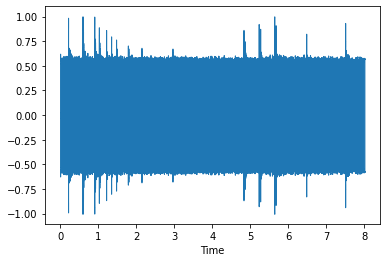

In [6]:
librosa.display.waveshow(sample, sr=sr)

In [11]:
boundaries_nleo, w_nleo = nonlinear_energy_operator(sample, 10, 0.1)
print("Number of boundaries: ", len(boundaries_nleo))
print("Boundary locations: ", boundaries_nleo)

Number of boundaries:  517
Boundary locations:  [    82     83     84     85     86     87     88     89     90     91
     92     93     94     95     96     97     98     99    100    101
  10111  10112  10113  10114  10115  10116  10117  10118  10119  10120
  10121  10122  10123  10124  10125  10126  10127  10128  10129  10130
  10131  10132  10133  10134  10135  10136  10137  10138  10139  10140
  10141  10142  10143  10144  10187  10188  10189  10190  10191  10192
  10193  10194  10195  10196  10197  10198  10199  28344  28345  28346
  28347  28348  28349  28350  28351  28352  28353  28354  28355  28356
  28357  28358  28359  28360  28361  28362  28363  28364  28365  28366
  28367  28368  28369  28370  28371  28372  28373  28374  28375  28376
  28377  28378  28423  28424  28425  28426  28427  28428  28429  28430
  28431  28432  28433  28434  28975  28976  28977  28978  28979  28980
  28981  28982  28983  28984  28985  28986  28987  28988  28989  28990
  28991  28992  28993  28994 

> TODO: fix boundary alignment when splicing with t1 not equal to 0
* a signal array does not preserve a notion of absolute time
* when a signal is spliced the time range becomes 0 to length of spliced signal.
* the logic for filtering boundaries preserves the notion of time relative to the non-spliced signal.
* this boundary value needs to be adjusted so that the boundary represents the index of the spliced signal. 

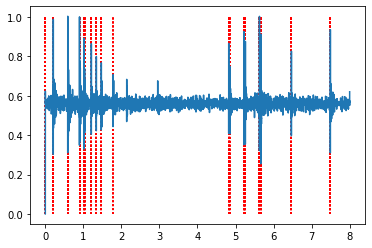

In [12]:
subsig, subbounds = signal_splice(sample, 0, 8, sr, boundaries_nleo)
plot_boundaries_on_waveform(subsig, subbounds, sr)